In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import *
from gpquant.SymbolicRegressor import SymbolicRegressor

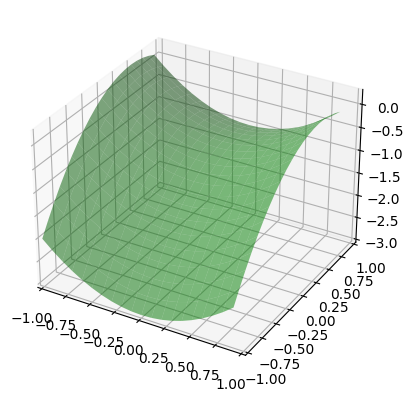

In [2]:
# Step 1
x0 = np.arange(-1, 1, 1 / 10.0)
x1 = np.arange(-1, 1, 1 / 10.0)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color="green", alpha=0.5)
plt.show()

In [3]:
# Step 2
rng = check_random_state(0)

# training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0] ** 2 - X_train[:, 1] ** 2 + X_train[:, 1] - 1
X_train = pd.DataFrame(X_train, columns=["X0", "X1"])
y_train = pd.Series(y_train)

# testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0] ** 2 - X_test[:, 1] ** 2 + X_test[:, 1] - 1


In [4]:
# Step 3
sr = SymbolicRegressor(
    population_size=2000,
    tournament_size=20,
    generations=20,
    stopping_criteria=0.01,
    p_crossover=0.7,
    p_subtree_mutate=0.1,
    p_hoist_mutate=0.1,
    p_point_mutate=0.05,
    init_depth=(6, 8),
    init_method="half and half",
    function_set=["add", "sub", "mul", "div", "square"],
    variable_set=["X0", "X1"],
    const_range=(0, 1),
    ts_const_range=(0, 1),
    build_preference=[0.75, 0.75],
    metric="mean absolute error",
    parsimony_coefficient=0.01,
)

sr.fit(X_train, y_train)

# Step 4
print(sr.best_estimator)

------------Generation  1------------
best estimator: sub(X1, 1)
best fitness: 0.3785249459290988
------------Generation  2------------
best estimator: sub(X1, 1)
best fitness: 0.3785249459290988
------------Generation  3------------
best estimator: sub(add(square(X0), X1), add(square(1), square(add(add(square(0), div(X1, 1)), square(square(0))))))
best fitness: 0.19000000000000006
------------Generation  4------------
best estimator: sub(add(square(X0), X1), add(square(1), square(add(add(square(0), X1), square(square(0))))))
best fitness: 0.17000000000000007
------------Generation  5------------
best estimator: sub(add(square(X0), X1), add(square(1), square(X1)))
best fitness: 0.10000000000000006
------------Generation  6------------
best estimator: sub(add(square(X0), X1), add(square(1), square(X1)))
best fitness: 0.10000000000000006
------------Generation  7------------
best estimator: sub(add(square(X0), X1), add(1, square(X1)))
best fitness: 0.09000000000000005
------------Generat

In [4]:
import gpquant.Function as f 

In [32]:
x = np.random.rand(100000)
z = pd.Series(x)

In [15]:
%%time
f._ts_mean(x, 9)

CPU times: user 1.92 ms, sys: 3.63 ms, total: 5.54 ms
Wall time: 4.27 ms


array([       nan,        nan,        nan, ..., 0.44518209, 0.48789865,
       0.48027122])